# DNA & RNA Simulated Load Balancing Plots

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
sns.set_context('talk')
sns.set_style('ticks')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#cores
cores = [1, 2, 4, 8, 16, 20, 32, 64, 128, 256]

# DNA 1 & 2

In [3]:
#read in data
d1 = pd.read_csv('../data/simulation_timings/DNA1.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#read in data
d2 = pd.read_csv('../data/simulation_timings/DNA2.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#sort by 'case'
d1 = d1.sort_values(by=['case'])
d2 = d2.sort_values(by=['case'])
d1.head(10), d2.head(10)

(        case  cores  idle_time  compute_time  total_time  %_wasted
 1   bestCase      1       0.01        949.99      949.99  0.000011
 37  bestCase    256    2633.95       3581.44       13.99  0.735444
 25  bestCase     32      66.97       1016.64       31.77  0.065874
 5   bestCase      2       0.39        950.36      475.18  0.000410
 17  bestCase     16     166.81       1116.64       69.79  0.149386
 33  bestCase    128     842.01       1790.72       13.99  0.470208
 9   bestCase      4       0.37        950.32      237.58  0.000389
 21  bestCase     20     214.01       1163.80       58.19  0.183889
 29  bestCase     64     151.45       1100.80       17.20  0.137582
 13  bestCase      8      53.77       1003.68      125.46  0.053573,
         case  cores  idle_time  compute_time  total_time  %_wasted
 1   bestCase      1       0.01       1266.95     1266.95  0.000008
 37  bestCase    256    1989.31       3253.76       12.71  0.611388
 25  bestCase     32      58.81       1325.44  

In [4]:
#separate cases
#DNA1
d1_best = d1.iloc[0:10].sort_values(by=['cores'])
d1_original = d1.iloc[10:20].sort_values(by=['cores'])
d1_random = d1.iloc[20:30].sort_values(by=['cores'])
d1_worst = d1.iloc[30:40].sort_values(by=['cores'])

#DNA2
d2_best = d2.iloc[0:10].sort_values(by=['cores'])
d2_original = d2.iloc[10:20].sort_values(by=['cores'])
d2_random = d2.iloc[20:30].sort_values(by=['cores'])
d2_worst = d2.iloc[30:40].sort_values(by=['cores'])

#calculate speedups
#DNA1
d1_best_speedup = [d1_best.iloc[0]['total_time']/p for p in d1_best['total_time']]
d1_original_speedup = [d1_original.iloc[0]['total_time']/p for p in d1_original['total_time']]
d1_random_speedup = [d1_random.iloc[0]['total_time']/p for p in d1_random['total_time']]
d1_worst_speedup = [d1_worst.iloc[0]['total_time']/p for p in d1_worst['total_time']]

#DNA2
d2_best_speedup = [d2_best.iloc[0]['total_time']/p for p in d2_best['total_time']]
d2_original_speedup = [d2_original.iloc[0]['total_time']/p for p in d2_original['total_time']]
d2_random_speedup = [d2_random.iloc[0]['total_time']/p for p in d2_random['total_time']]
d2_worst_speedup = [d2_worst.iloc[0]['total_time']/p for p in d2_worst['total_time']]

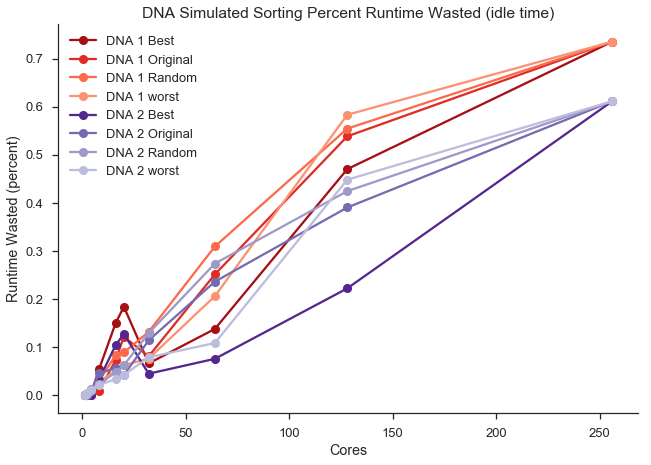

In [5]:
#plot %wasted vs. cores for simulated sorting
#DNA1
plt.plot(cores, d1_best['%_wasted'], '-o', c ='#a50f15', label='DNA 1 Best')
plt.plot(cores, d1_original['%_wasted'], '-o', c ='#de2d26', label='DNA 1 Original')
plt.plot(cores, d1_random['%_wasted'], '-o', c ='#fb6a4a', label='DNA 1 Random')
plt.plot(cores, d1_worst['%_wasted'], '-o', c ='#fc9272', label='DNA 1 worst')

#DNA2
plt.plot(cores, d2_best['%_wasted'], '-o', c ='#54278f', label='DNA 2 Best')
plt.plot(cores, d2_original['%_wasted'], '-o', c ='#756bb1', label='DNA 2 Original')
plt.plot(cores, d2_random['%_wasted'], '-o', c ='#9e9ac8', label='DNA 2 Random')
plt.plot(cores, d2_worst['%_wasted'], '-o', c ='#bcbddc', label='DNA 2 worst')

#labels
plt.title('DNA Simulated Sorting Percent Runtime Wasted (idle time)')
plt.xlabel('Cores')
plt.ylabel('Runtime Wasted (percent)')
plt.legend(loc = 'upper left')
sns.despine();

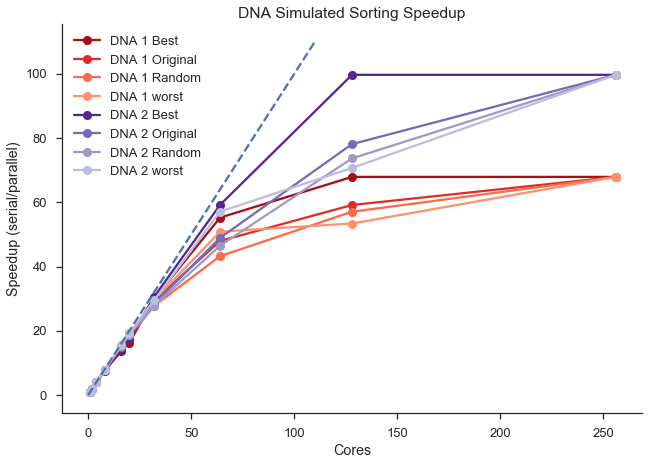

In [6]:
#plot speedup vs. cores for simulated sorting
#DNA1
plt.plot(cores, d1_best_speedup, '-o', c ='#a50f15', label='DNA 1 Best')
plt.plot(cores, d1_original_speedup, '-o', c ='#de2d26', label='DNA 1 Original')
plt.plot(cores, d1_random_speedup, '-o', c ='#fb6a4a', label='DNA 1 Random')
plt.plot(cores, d1_worst_speedup, '-o', c ='#fc9272', label='DNA 1 worst')

#DNA2
plt.plot(cores, d2_best_speedup, '-o', c ='#54278f', label='DNA 2 Best')
plt.plot(cores, d2_original_speedup, '-o', c ='#756bb1', label='DNA 2 Original')
plt.plot(cores, d2_random_speedup, '-o', c ='#9e9ac8', label='DNA 2 Random')
plt.plot(cores, d2_worst_speedup, '-o', c ='#bcbddc', label='DNA 2 worst')

# add diagonal line
x = [0, 110]
y = [0, 110]
plt.plot(x, y, '--')

#labels
plt.title('DNA Simulated Sorting Speedup')
plt.xlabel('Cores')
plt.ylabel('Speedup (serial/parallel)')
plt.legend(loc = 'upper left')
sns.despine();

# RNA 1 & 2

In [7]:
#read in data
r1 = pd.read_csv('../data/simulation_timings/RNA1.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])
r2 = pd.read_csv('../data/simulation_timings/RNA2.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#sort by 'case'
r1 = r1.sort_values(by=['case'])
r2 = r2.sort_values(by=['case'])
r1.head(10), r2.head(10)

(        case  cores  idle_time  compute_time  total_time  %_wasted
 1   bestCase      1       0.01       2101.31     2101.31  0.000005
 37  bestCase    256    5161.35       7260.16       28.36  0.710914
 25  bestCase     32     115.97       2216.96       69.28  0.052310
 5   bestCase      2       0.07       2101.36     1050.68  0.000033
 17  bestCase     16     103.33       2204.48      137.78  0.046873
 33  bestCase    128    1530.05       3630.08       28.36  0.421492
 9   bestCase      4       9.45       2110.72      527.68  0.004477
 21  bestCase     20     144.29       2245.40      112.27  0.064260
 29  bestCase     64    1291.97       3392.64       53.01  0.380816
 13  bestCase      8      11.25       2112.48      264.06  0.005325,
         case  cores  idle_time  compute_time  total_time  %_wasted
 1   bestCase      1       0.01       1832.77     1832.77  0.000005
 37  bestCase    256   18470.53      20300.80       79.30  0.909842
 25  bestCase     32     765.31       2597.76  

In [8]:
#separate cases
#RNA1
r1_best = r1.iloc[0:10].sort_values(by=['cores'])
r1_original = r1.iloc[10:20].sort_values(by=['cores'])
r1_random = r1.iloc[20:30].sort_values(by=['cores'])
r1_worst = r1.iloc[30:40].sort_values(by=['cores'])

#RNA2
r2_best = r2.iloc[0:10].sort_values(by=['cores'])
r2_original = r2.iloc[10:20].sort_values(by=['cores'])
r2_random = r2.iloc[20:30].sort_values(by=['cores'])
r2_worst = r2.iloc[30:40].sort_values(by=['cores'])

#speedup
#RNA1
r1_best_speedup = [r1_best.iloc[0]['total_time']/p for p in r1_best['total_time']]
r1_original_speedup = [r1_original.iloc[0]['total_time']/p for p in r1_original['total_time']]
r1_random_speedup = [r1_random.iloc[0]['total_time']/p for p in r1_random['total_time']]
r1_worst_speedup = [r1_worst.iloc[0]['total_time']/p for p in r1_worst['total_time']]

#RNA2
r2_best_speedup = [r2_best.iloc[0]['total_time']/p for p in r2_best['total_time']]
r2_original_speedup = [r2_original.iloc[0]['total_time']/p for p in r2_original['total_time']]
r2_random_speedup = [r2_random.iloc[0]['total_time']/p for p in r2_random['total_time']]
r2_worst_speedup = [r2_worst.iloc[0]['total_time']/p for p in r2_worst['total_time']]

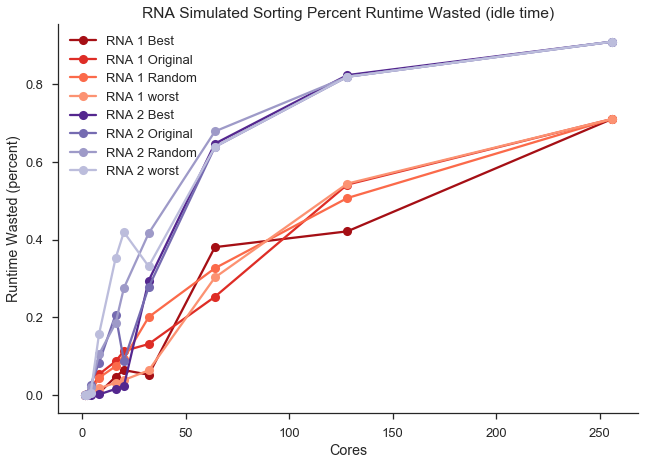

In [9]:
#plot %wasted vs. cores for simulated sorting
#RNA1
plt.plot(cores, r1_best['%_wasted'], '-o', c ='#a50f15', label='RNA 1 Best')
plt.plot(cores, r1_original['%_wasted'], '-o', c ='#de2d26', label='RNA 1 Original')
plt.plot(cores, r1_random['%_wasted'], '-o', c ='#fb6a4a', label='RNA 1 Random')
plt.plot(cores, r1_worst['%_wasted'], '-o', c ='#fc9272', label='RNA 1 worst')

#DNA2
plt.plot(cores, r2_best['%_wasted'], '-o', c ='#54278f', label='RNA 2 Best')
plt.plot(cores, r2_original['%_wasted'], '-o', c ='#756bb1', label='RNA 2 Original')
plt.plot(cores, r2_random['%_wasted'], '-o', c ='#9e9ac8', label='RNA 2 Random')
plt.plot(cores, r2_worst['%_wasted'], '-o', c ='#bcbddc', label='RNA 2 worst')

#labels
plt.title('RNA Simulated Sorting Percent Runtime Wasted (idle time)')
plt.xlabel('Cores')
plt.ylabel('Runtime Wasted (percent)')
plt.legend(loc = 'upper left')
sns.despine();

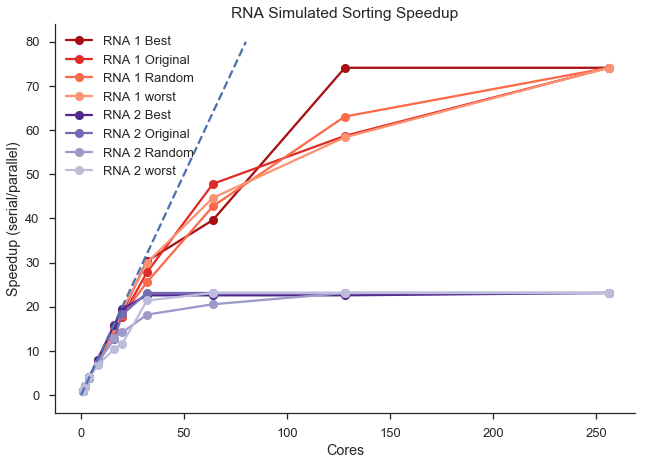

In [10]:
#plot speedup vs. cores for simulated sorting
#RNA1
plt.plot(cores, r1_best_speedup, '-o', c ='#a50f15', label='RNA 1 Best')
plt.plot(cores, r1_original_speedup, '-o', c ='#de2d26', label='RNA 1 Original')
plt.plot(cores, r1_random_speedup, '-o', c ='#fb6a4a', label='RNA 1 Random')
plt.plot(cores, r1_worst_speedup, '-o', c ='#fc9272', label='RNA 1 worst')

#RNA2
plt.plot(cores, r2_best_speedup, '-o', c ='#54278f', label='RNA 2 Best')
plt.plot(cores, r2_original_speedup, '-o', c ='#756bb1', label='RNA 2 Original')
plt.plot(cores, r2_random_speedup, '-o', c ='#9e9ac8', label='RNA 2 Random')
plt.plot(cores, r2_worst_speedup, '-o', c ='#bcbddc', label='RNA 2 worst')

# add diagonal line
x = [0, 80]
y = [0, 80]
plt.plot(x, y, '--')

#labels
plt.title('RNA Simulated Sorting Speedup')
plt.xlabel('Cores')
plt.ylabel('Speedup (serial/parallel)')
plt.legend(loc = 'upper left')
sns.despine();